引入必要库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk, messagebox
import control as ct

必要函数的定义

In [2]:
def step_response(sys, T):
    """
    阶跃响应仿真

    参数:
    sys: 系统传递函数
    T: 仿真时间数组

    返回:
    t: 时间数组
    y: 响应值数组
    """
    t, y = ct.step_response(sys, T)
    return t, y


def impulse_response(sys, T):
    """
    脉冲响应仿真

    参数:
    sys: 系统传递函数
    T: 仿真时间数组

    返回:
    t: 时间数组
    y: 响应值数组
    """
    t, y = ct.impulse_response(sys, T)
    return t, y


def compute_performance(t, y):
    """
    计算系统性能指标

    参数:
    t: 时间数组
    y: 响应值数组

    返回:
    tr: 上升时间
    tp: 峰值时间
    Mp: 超调量(%)
    ts_2: 2%调节时间
    ts_5: 5%调节时间
    """
    # 稳态值
    y_ss = y[-1]

    # 计算上升时间 (从10%到90%)
    idx_10 = np.argmax(y >= 0.1 * y_ss)
    idx_90 = np.argmax(y >= 0.9 * y_ss)
    tr = t[idx_90] - t[idx_10]

    # 计算峰值时间和超调量
    y_max = np.max(y)
    tp = t[np.argmax(y)]
    Mp = (y_max - y_ss) / y_ss * 100 if y_ss != 0 else 0

    # 计算调节时间 (2%和5%误差带)
    if y_ss != 0:
        # 2%误差带
        idx_settle_2 = np.where(np.abs(y - y_ss) > 0.02 * np.abs(y_ss))[0]
        ts_2 = t[idx_settle_2[-1]] if len(idx_settle_2) > 0 else 0

        # 5%误差带
        idx_settle_5 = np.where(np.abs(y - y_ss) > 0.05 * np.abs(y_ss))[0]
        ts_5 = t[idx_settle_5[-1]] if len(idx_settle_5) > 0 else 0
    else:
        ts_2 = 0
        ts_5 = 0

    return tr, tp, Mp, ts_2, ts_5


def plot_response(t, y, response_type, sys_name="System"):
    """
    绘制响应曲线并显示性能指标

    参数:
    t: 时间数组
    y: 响应值数组
    response_type: 响应类型 ('step' 或 'impulse')
    sys_name: 系统名称
    """
    # 计算性能指标
    tr, tp, Mp, ts_2, ts_5 = compute_performance(t, y)

    # 创建图形
    plt.figure(figsize=(10, 6))

    # 绘制响应曲线
    plt.plot(t, y, 'b-', linewidth=2)

    # 添加稳态值线
    y_ss = y[-1]
    plt.axhline(y=y_ss, color='r', linestyle='--', alpha=0.7, label=f'Steady State: {y_ss:.3f}')

    # 标记关键点
    plt.plot(tp, np.max(y), 'ro', markersize=8, label=f'Peak: {np.max(y):.3f} at {tp:.3f}s')

    # 添加调节时间线
    if ts_2 > 0:
        plt.axvline(x=ts_2, color='g', linestyle='--', alpha=0.7, label=f'Settling Time (2%): {ts_2:.3f}s')
    if ts_5 > 0:
        plt.axvline(x=ts_5, color='m', linestyle='--', alpha=0.7, label=f'Settling Time (5%): {ts_5:.3f}s')

    # 设置图形属性
    plt.title(f'{sys_name} {response_type.capitalize()} Response', fontsize=14)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()

    # 在图上添加性能指标文本
    textstr = '\n'.join((
        f'Rise Time: {tr:.3f} s',
        f'Peak Time: {tp:.3f} s',
        f'Overshoot: {Mp:.2f}%',
        f'Settling Time (2%): {ts_2:.3f} s',
        f'Settling Time (5%): {ts_5:.3f} s'))

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.75, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=props)

    plt.tight_layout()
    plt.show()

示例使用

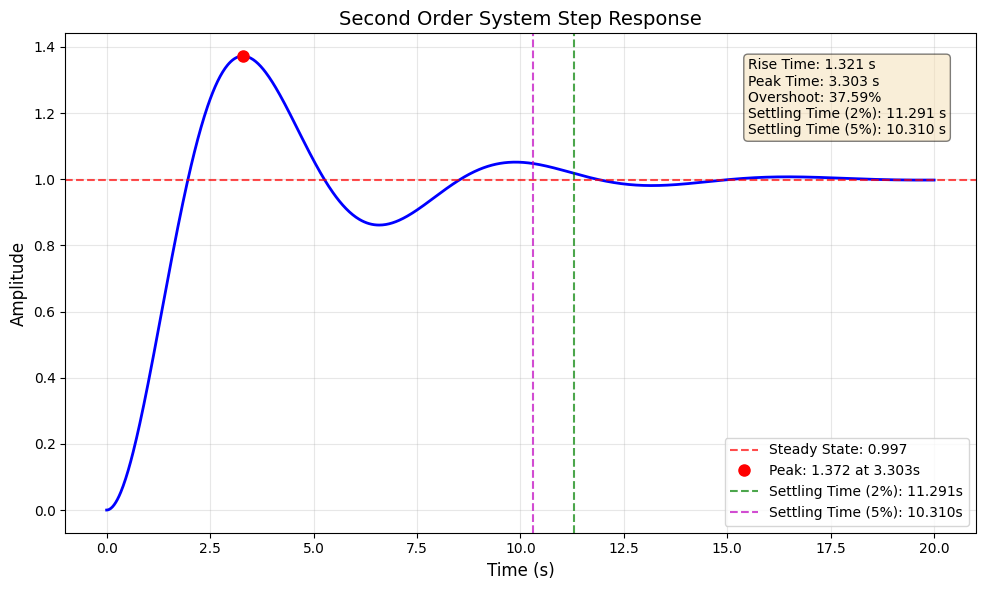

Performance Metrics for Step Response:
Rise Time: 1.321 s
Peak Time: 3.303 s
Overshoot: 37.59%
Settling Time (2%): 11.291 s
Settling Time (5%): 10.310 s


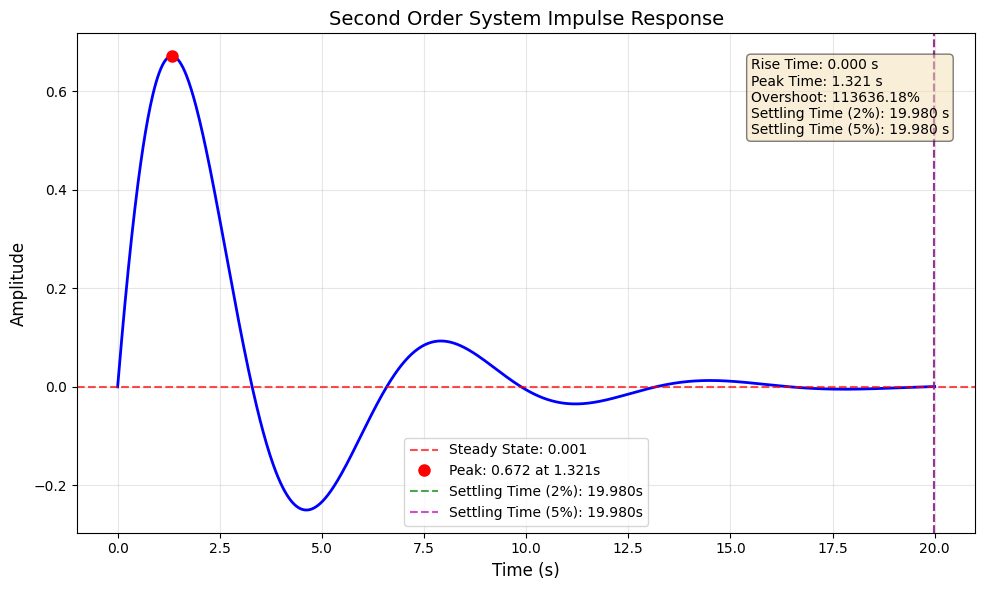

Performance Metrics for Impulse Response:
Rise Time: 0.000 s
Peak Time: 1.321 s
Overshoot: 113636.18%
Settling Time (2%): 19.980 s
Settling Time (5%): 19.980 s


In [4]:
# 创建一个二阶系统示例：G(s) = 1/(s^2 + 0.6s + 1)
sys = ct.tf([1], [1, 0.6, 1])

# 设置仿真时间
T = np.linspace(0, 20, 1000)

# 阶跃响应仿真与绘图
t_step, y_step = step_response(sys, T)
plot_response(t_step, y_step, 'step', 'Second Order System')
# 打印性能指标
tr, tp, Mp, ts_2, ts_5 = compute_performance(t_step, y_step)
print("Performance Metrics for Step Response:")
print(f"Rise Time: {tr:.3f} s")
print(f"Peak Time: {tp:.3f} s")
print(f"Overshoot: {Mp:.2f}%")
print(f"Settling Time (2%): {ts_2:.3f} s")
print(f"Settling Time (5%): {ts_5:.3f} s")

# 脉冲响应仿真与绘图
t_impulse, y_impulse = impulse_response(sys, T)
plot_response(t_impulse, y_impulse, 'impulse', 'Second Order System')
# 打印性能指标
tr, tp, Mp, ts_2, ts_5 = compute_performance(t_impulse, y_impulse)
print("Performance Metrics for Impulse Response:")
print(f"Rise Time: {tr:.3f} s")
print(f"Peak Time: {tp:.3f} s")
print(f"Overshoot: {Mp:.2f}%")
print(f"Settling Time (2%): {ts_2:.3f} s")
print(f"Settling Time (5%): {ts_5:.3f} s")

添加GUI界面，实现自定义仿真

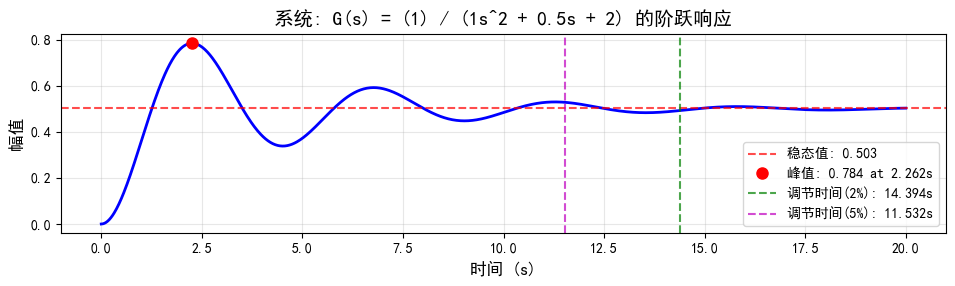

In [2]:
class ControlSystemAnalyzer:
    def __init__(self, root):
        self.root = root
        self.root.title("控制系统分析与仿真")
        self.root.geometry("1000x700")

        # 创建主框架
        self.main_frame = ttk.Frame(self.root, padding="10")
        self.main_frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

        # 配置网格权重
        self.root.columnconfigure(0, weight=1)
        self.root.rowconfigure(0, weight=1)
        self.main_frame.columnconfigure(1, weight=1)
        self.main_frame.rowconfigure(4, weight=1)

        # 系统输入部分
        ttk.Label(self.main_frame, text="系统传递函数:").grid(row=0, column=0, sticky=tk.W, pady=5)

        input_frame = ttk.Frame(self.main_frame)
        input_frame.grid(row=0, column=1, columnspan=2, sticky=(tk.W, tk.E), pady=5)
        input_frame.columnconfigure(1, weight=1)

        ttk.Label(input_frame, text="分子 (逗号分隔系数):").grid(row=0, column=0, sticky=tk.W)
        self.num_entry = ttk.Entry(input_frame, width=30)
        self.num_entry.grid(row=0, column=1, sticky=(tk.W, tk.E), padx=5)
        self.num_entry.insert(0, "输入分子")

        ttk.Label(input_frame, text="分母 (逗号分隔系数):").grid(row=1, column=0, sticky=tk.W, pady=5)
        self.den_entry = ttk.Entry(input_frame, width=30)
        self.den_entry.grid(row=1, column=1, sticky=(tk.W, tk.E), padx=5)
        self.den_entry.insert(0, "输入分母")

        # 响应类型选择
        ttk.Label(self.main_frame, text="响应类型:").grid(row=1, column=0, sticky=tk.W, pady=5)
        self.response_type = tk.StringVar(value="step")
        response_frame = ttk.Frame(self.main_frame)
        response_frame.grid(row=1, column=1, sticky=tk.W, pady=5)
        ttk.Radiobutton(response_frame, text="阶跃响应", variable=self.response_type, value="step").pack(side=tk.LEFT)
        ttk.Radiobutton(response_frame, text="脉冲响应", variable=self.response_type, value="impulse").pack(
            side=tk.LEFT)

        # 仿真时间设置
        ttk.Label(self.main_frame, text="仿真时间:").grid(row=2, column=0, sticky=tk.W, pady=5)
        time_frame = ttk.Frame(self.main_frame)
        time_frame.grid(row=2, column=1, sticky=tk.W, pady=5)

        ttk.Label(time_frame, text="起始时间:").pack(side=tk.LEFT)
        self.t_start = tk.DoubleVar(value=0.0)
        ttk.Entry(time_frame, textvariable=self.t_start, width=8).pack(side=tk.LEFT, padx=5)

        ttk.Label(time_frame, text="结束时间:").pack(side=tk.LEFT, padx=(10, 0))
        self.t_end = tk.DoubleVar(value=20.0)
        ttk.Entry(time_frame, textvariable=self.t_end, width=8).pack(side=tk.LEFT, padx=5)

        ttk.Label(time_frame, text="点数:").pack(side=tk.LEFT, padx=(10, 0))
        self.n_points = tk.IntVar(value=1000)
        ttk.Entry(time_frame, textvariable=self.n_points, width=8).pack(side=tk.LEFT, padx=5)

        # 按钮
        button_frame = ttk.Frame(self.main_frame)
        button_frame.grid(row=3, column=0, columnspan=3, pady=10)
        ttk.Button(button_frame, text="仿真", command=self.simulate).pack(side=tk.LEFT, padx=5)
        ttk.Button(button_frame, text="清除", command=self.clear).pack(side=tk.LEFT, padx=5)
        ttk.Button(button_frame, text="退出", command=self.root.quit).pack(side=tk.LEFT, padx=5)

        # 结果显示区域
        result_frame = ttk.LabelFrame(self.main_frame, text="仿真结果", padding="5")
        result_frame.grid(row=4, column=0, columnspan=3, sticky=(tk.W, tk.E, tk.N, tk.S), pady=5)
        result_frame.columnconfigure(0, weight=1)
        result_frame.rowconfigure(0, weight=1)

        # 创建图表
        self.fig, self.ax = plt.subplots(figsize=(10, 6))
        plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
        plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
        self.canvas = FigureCanvasTkAgg(self.fig, master=result_frame)
        self.canvas.get_tk_widget().grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

        # 性能指标显示
        metrics_frame = ttk.LabelFrame(self.main_frame, text="性能指标", padding="5")
        metrics_frame.grid(row=5, column=0, columnspan=3, sticky=(tk.W, tk.E), pady=5)
        metrics_frame.columnconfigure(1, weight=1)

        self.metrics_vars = {}
        metrics = [("上升时间 tr (s):", "tr"),
                   ("峰值时间 tp (s):", "tp"),
                   ("超调量 Mp (%):", "Mp"),
                   ("调节时间 ts(2%) (s):", "ts_2"),
                   ("调节时间 ts(5%) (s):", "ts_5")]

        for i, (label, key) in enumerate(metrics):
            ttk.Label(metrics_frame, text=label).grid(row=i, column=0, sticky=tk.W, padx=5, pady=2)
            self.metrics_vars[key] = tk.StringVar(value="N/A")
            ttk.Label(metrics_frame, textvariable=self.metrics_vars[key]).grid(row=i, column=1, sticky=tk.W, padx=5,
                                                                               pady=2)

    def parse_coeffs(self, coeff_str):
        """解析系数字符串为数值列表"""
        try:
            # 移除所有空格并按逗号分割
            coeffs = [float(x.strip()) for x in coeff_str.split(',') if x.strip()]
            return coeffs
        except ValueError:
            messagebox.showerror("输入错误", "系数必须为逗号分隔的数值")
            return None

    def simulate(self):
        """执行仿真"""
        # 获取分子分母系数
        num_coeffs = self.parse_coeffs(self.num_entry.get())
        den_coeffs = self.parse_coeffs(self.den_entry.get())

        if num_coeffs is None or den_coeffs is None:
            return

        # 创建系统传递函数
        try:
            sys = ct.tf(num_coeffs, den_coeffs)
        except Exception as e:
            messagebox.showerror("系统错误", f"创建传递函数时出错: {str(e)}")
            return

        # 获取仿真时间参数
        try:
            t_start = self.t_start.get()
            t_end = self.t_end.get()
            n_points = self.n_points.get()

            if t_end <= t_start:
                messagebox.showerror("参数错误", "结束时间必须大于起始时间")
                return

            if n_points <= 0:
                messagebox.showerror("参数错误", "点数必须为正整数")
                return

            T = np.linspace(t_start, t_end, n_points)
        except tk.TclError:
            messagebox.showerror("参数错误", "时间参数必须为有效数值")
            return

        # 执行仿真
        response_type = self.response_type.get()
        if response_type == "step":
            t, y = ct.step_response(sys, T)
        else:  # impulse
            t, y = ct.impulse_response(sys, T)

        # 计算性能指标
        if response_type == "step":
            tr, tp, Mp, ts_2, ts_5 = self.compute_performance(t, y)
            self.metrics_vars["tr"].set(f"{tr:.4f}")
            self.metrics_vars["tp"].set(f"{tp:.4f}")
            self.metrics_vars["Mp"].set(f"{Mp:.2f}")
            self.metrics_vars["ts_2"].set(f"{ts_2:.4f}")
            self.metrics_vars["ts_5"].set(f"{ts_5:.4f}")
        else:
            # 对于脉冲响应，不计算性能指标
            for key in self.metrics_vars:
                self.metrics_vars[key].set("N/A")

        # 绘制结果
        self.ax.clear()
        self.ax.plot(t, y, 'b-', linewidth=2)

        # 添加标题和标签
        sys_str = self.get_tf_string(num_coeffs, den_coeffs)
        response_name = "阶跃" if response_type == "step" else "脉冲"
        self.ax.set_title(f"系统: {sys_str} 的{response_name}响应", fontsize=14)
        self.ax.set_xlabel('时间 (s)', fontsize=12)
        self.ax.set_ylabel('幅值', fontsize=12)
        self.ax.grid(True, alpha=0.3)

        # 如果是阶跃响应，添加性能指标标注
        if response_type == "step":
            y_ss = y[-1]
            self.ax.axhline(y=y_ss, color='r', linestyle='--', alpha=0.7, label=f'稳态值: {y_ss:.3f}')

            # 标记峰值点
            y_max = np.max(y)
            t_max = t[np.argmax(y)]
            self.ax.plot(t_max, y_max, 'ro', markersize=8, label=f'峰值: {y_max:.3f} at {t_max:.3f}s')

            # 添加调节时间线
            if ts_2 > 0:
                self.ax.axvline(x=ts_2, color='g', linestyle='--', alpha=0.7, label=f'调节时间(2%): {ts_2:.3f}s')
            if ts_5 > 0:
                self.ax.axvline(x=ts_5, color='m', linestyle='--', alpha=0.7, label=f'调节时间(5%): {ts_5:.3f}s')

            self.ax.legend()

        self.fig.tight_layout()
        self.canvas.draw()

    def compute_performance(self, t, y):
        """计算系统性能指标"""
        # 稳态值
        y_ss = y[-1]

        # 计算上升时间 (从10%到90%)
        idx_10 = np.argmax(y >= 0.1 * y_ss)
        idx_90 = np.argmax(y >= 0.9 * y_ss)
        tr = t[idx_90] - t[idx_10] if idx_90 > idx_10 else 0

        # 计算峰值时间和超调量
        y_max = np.max(y)
        tp = t[np.argmax(y)]
        Mp = (y_max - y_ss) / y_ss * 100 if y_ss != 0 else 0

        # 计算调节时间 (2%和5%误差带)
        if y_ss != 0:
            # 2%误差带
            idx_settle_2 = np.where(np.abs(y - y_ss) > 0.02 * np.abs(y_ss))[0]
            ts_2 = t[idx_settle_2[-1]] if len(idx_settle_2) > 0 else 0

            # 5%误差带
            idx_settle_5 = np.where(np.abs(y - y_ss) > 0.05 * np.abs(y_ss))[0]
            ts_5 = t[idx_settle_5[-1]] if len(idx_settle_5) > 0 else 0
        else:
            ts_2 = 0
            ts_5 = 0

        return tr, tp, Mp, ts_2, ts_5

    def get_tf_string(self, num, den):
        """将系数列表转换为传递函数字符串表示"""

        def poly_to_str(coeffs, var='s'):
            terms = []
            for i, c in enumerate(coeffs):
                power = len(coeffs) - i - 1
                if c == 0:
                    continue
                if power == 0:
                    terms.append(f"{c:.3g}")
                elif power == 1:
                    terms.append(f"{c:.3g}{var}")
                else:
                    terms.append(f"{c:.3g}{var}^{power}")
            return " + ".join(terms)

        num_str = poly_to_str(num)
        den_str = poly_to_str(den)
        return f"G(s) = ({num_str}) / ({den_str})"

    def clear(self):
        """清除图表和指标"""
        self.ax.clear()
        self.ax.set_title("控制系统响应")
        self.ax.set_xlabel('时间 (s)')
        self.ax.set_ylabel('幅值')
        self.ax.grid(True, alpha=0.3)
        self.canvas.draw()

        for key in self.metrics_vars:
            self.metrics_vars[key].set("N/A")


if __name__ == "__main__":
    root = tk.Tk()
    app = ControlSystemAnalyzer(root)
    root.mainloop()

这个GUI应用程序提供了以下功能：

1、系统输入：用户可以输入传递函数的分子和分母系数（以英文逗号分隔）。

2、响应类型选择：可以选择阶跃响应或脉冲响应。

3、仿真参数设置：可以设置仿真的起始时间、结束时间和点数。

4、可视化结果：显示响应曲线图。对于阶跃响应，会标记稳态值、峰值点和调节时间线。

5、性能指标显示：显示上升时间、峰值时间、超调量和调节时间(2%和5%)。对于脉冲响应，性能指标显示为"N/A"。

6、操作按钮：仿真：执行仿真并更新图表和性能指标。清除：清除当前图表和指标。退出：关闭应用程序